# Efficiency with radionuclide mixtures

In [1]:
# pip install TDCRPy --upgrade

In [2]:
import tdcrpy as td
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

## Fixed parameters

In [3]:
mode = "eff"                # ask for efficiency calculation
Rad = "Fe-55, Ni-63"        # list of radionuclides
pmf_1="1"                   # relatives fractions of the radionulides
N = 1000                    # number of Monte Carlo trials
kB =1.0e-5                  # Birks constant in cm keV-1
V = 10                      # volume of scintillator in mL
L=1                         # free parameter in keV-1

## Mixture parameters

In [4]:
C = np.arange(0,1,0.05)     # relative fraction of the second nuclide

## Efficiency calculation

In [5]:
effS, ueffS, effD, ueffD, effT, ueffT, effD2, ueffD2 = [], [], [], [], [], [], [], []
for i in tqdm(C, desc="Processing items"):
    pmf_1 = f"{1-i}, {i}"
    result = td.TDCRPy.TDCRPy(L, Rad, pmf_1, N, kB, V, mode)
    effS.append(result[0]); ueffS.append(result[1])
    effD.append(result[2]); ueffD.append(result[3])
    effT.append(result[4]); ueffT.append(result[5])
    effD2.append(result[12]); ueffD2.append(result[13])
effD = np.asarray(effD); ueffD = np.asarray(ueffD)
effD2 = np.asarray(effD2); ueffD2 = np.asarray(ueffD2)
effT = np.asarray(effT); ueffT = np.asarray(ueffT)
TDCR = effT/effD

Processing items: 100%|████████████████████████████████████████████████████████████████| 20/20 [03:52<00:00, 11.63s/it]


## Plot the efficiency curves

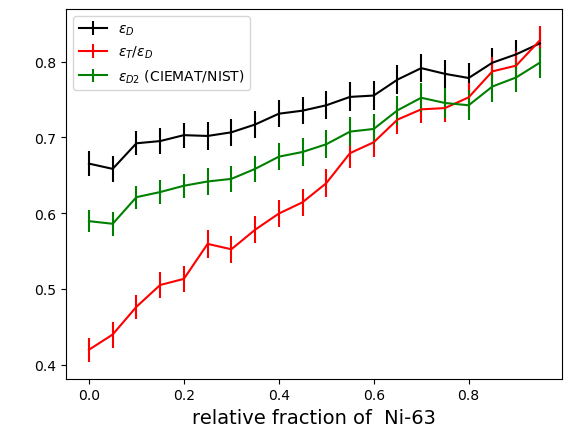

In [6]:
plt.figure("Stopping power")
plt.clf()
plt.errorbar(C,effD,yerr=2*ueffD,fmt="-k",label=r"$\epsilon_D$")
plt.errorbar(C,TDCR,yerr=2*ueffD,fmt="-r",label=r"$\epsilon_T/\epsilon_D$")
plt.errorbar(C,effD2,yerr=2*ueffD2,fmt="-g",label=r"$\epsilon_{D2}$ (CIEMAT/NIST)")
#plt.xscale('log')
plt.xlabel(f'relative fraction of {Rad.split(",")[1]}', fontsize=14)
plt.ylabel(r' ', fontsize=14)
plt.legend()
plt.savefig("stopping_power_plot.png")